# **CS 1810 Homework 1**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problems 1, 3, and 4 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [211]:
# Loading data
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

# Problem 1

## Problem 1 Subpart 1(a)

In [212]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    # Compute distances, shape is (n, m) where n is the number of test points and m is the number of training points
    predictions = []
        
    for x in x_new:
        # Compute distances from x to all x_train points
        distances = np.abs(x_train - x)
        
        # Get indices of k nearest neighbors
        knn_indices = np.argsort(distances)[:k]
        
        # Compute the mean of the k nearest neighbor's y values
        knn_values = y_train[knn_indices]
        prediction = np.mean(knn_values)
        
        predictions.append(prediction)
        
    return np.array(predictions)


(400,)


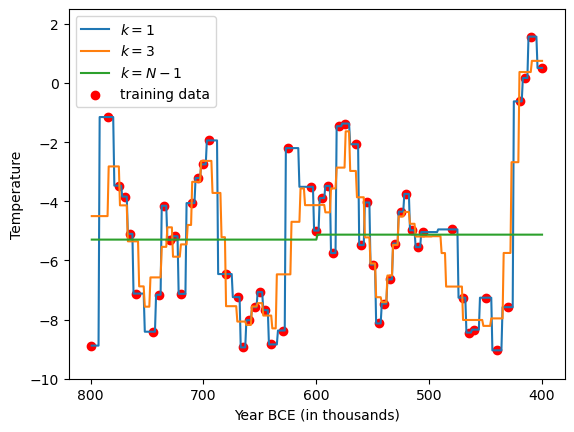

In [213]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
print(np.shape(predict_knn(x_array, 1, year_train, temp_train)))
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
plt.show()

## Problem 1 Subpart 1(b)

In [214]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    # YOUR CODE HERE
    mse = np.mean((true-predictions)**2)    
    return mse

In [215]:
# Compute the MSEs for different values of k
# YOUR CODE HERE

# create prediction function for kernel n
def prediction(n):
    prediction_knn = predict_knn(year_test, n, year_train, temp_train)
    return prediction_knn

# create loop through prediction to test all of k values from 1 to N-1
best_mse = 1000
best_k = 0

for i in (1, 3, N):
    mse = model_mse(prediction(i),temp_test)
    print ('When k =',i," mse =",mse)
    if mse < best_mse:
        best_mse = mse
        best_k = i

print("The lowest mse value appears when k=",best_k,"and this yields a mse value of", best_mse)

When k = 1  mse = 1.7406000000000004
When k = 3  mse = 3.8907662222222212
When k = 57  mse = 9.578326603878116
The lowest mse value appears when k= 1 and this yields a mse value of 1.7406000000000004


## Problem 1 Subpart 2(a)

In [216]:
# create function Kτ(x, x′) = exp(- (x - x′)^2 / tau)
def new_k(x, x_p, tau):
    k = np.exp(-((x-x_p)**2)/tau)
    return k

def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_new.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    f_k = np.zeros_like(x_new, dtype=np.float64)
    
    for i, x in enumerate(x_new):
        k_weight = new_k(x_train, x, tau) 
        f_k[i] = np.sum(k_weight * y_train) / np.sum(k_weight) 

    return f_k  

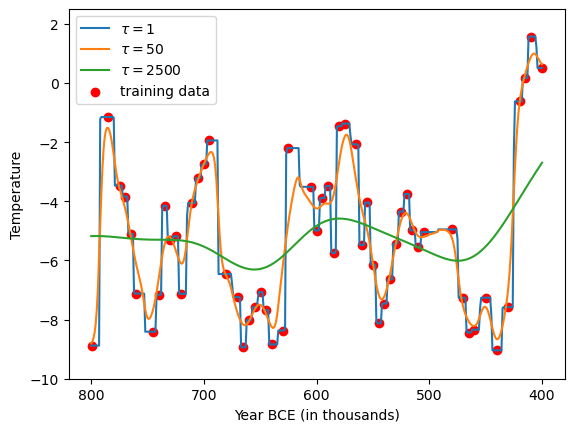

In [217]:
# Plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
plt.show()

## Problem 1 Subpart 2(c)

In [218]:
# Compute the MSEs for different values of tau
# YOUR CODE HERE
def compute_mse(X_train, y_train, X_test, y_test, tau):
    M = len(y_test)
    mse = 0
    
    for i, x_m in enumerate(X_test):
        k_weight = new_k(X_train, x_m, tau)
        y_pred_m = np.sum(k_weight * y_train) / np.sum(k_weight)
        mse += (y_test[i] - y_pred_m) ** 2
    
    return mse / M

for i in [1, 50, 2500]:
    print('When tau =' ,i,", the predicted MSE for ft is: ", compute_mse(year_train,temp_train,year_test, temp_test, i))

When tau = 1 , the predicted MSE for ft is:  1.9472621565209178
When tau = 50 , the predicted MSE for ft is:  1.858289916961345
When tau = 2500 , the predicted MSE for ft is:  8.333886806980791


# Problem 3

## Problem 3 Subpart 1

In [219]:
def exp_kernel(x,mu):
    return np.exp(-1/float(5)*np.power(x-mu,2))

def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X

# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`

def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  # Determine number of basis functions (D)
  if part == 'a' or part == 'b' or part == 'c':
      D = 10
  elif part == 'd':
      D = 50

  # Create a matrix for the basis functions
  phi_X = np.ones((len(X), D))  # Add +1 for the bias term (column of ones)

  # Generate basis functions for each part
  if part == 'a':  # Basis: phi_j(x) = f(x)^j for j=1 to 9
      for j in range(1, D):
          phi_X[:, j] = np.power(X, j)

  elif part == 'b':  # Basis: phi_j(x) = exp(-(f(x)-mu_j)^2 / 5) for j=1 to 9
      mu_values = (np.arange(1, D) + 7) / 8  # Values of mu_j
      for j in range(1, D):
          phi_X[:, j] = np.exp(-0.2 * np.power(X - mu_values[j-1], 2))

  elif part == 'c':  # Basis: phi_j(x) = cos(f(x)/j) for j=1 to 9
      for j in range(1, D):
          phi_X[:, j] = np.cos(X / j)

  elif part == 'd':  # Basis: phi_j(x) = cos(f(x)/j) for j=1 to 49
      for j in range(1, D):
          phi_X[:, j] = np.cos(X / j)
  
  return phi_X


We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [220]:
# Helper function to find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star


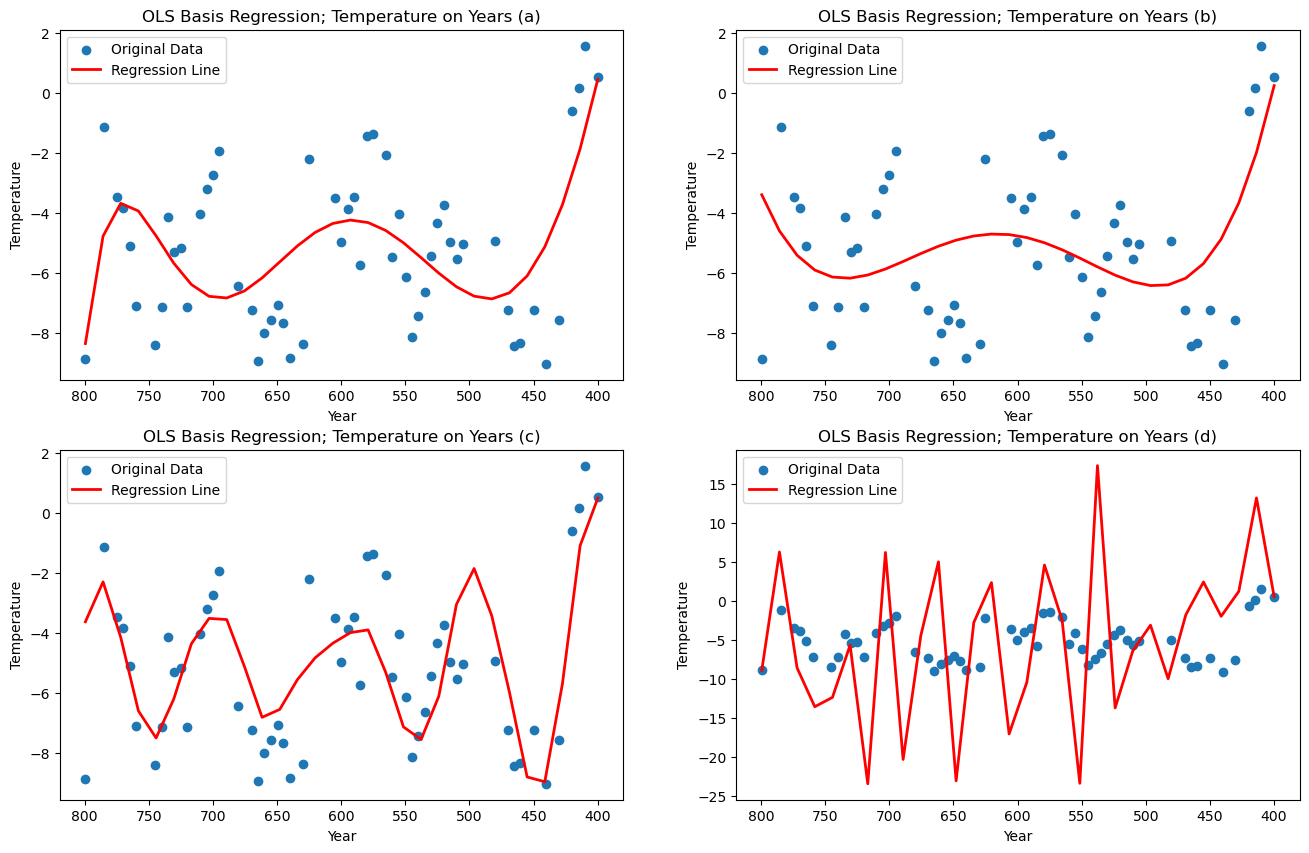

In [221]:
_, ax = plt.subplots(2, 2, figsize=(16, 10))

for i, part in enumerate(['a', 'b', 'c', 'd']):
    # Plotting the original data
    phi_years_train = make_basis(year_train, part)
    w = find_weights(phi_years_train, temp_train)

    ax[i // 2, i % 2].scatter(year_train, temp_train, label="Original Data")

    # Create a fine grid of years to plot the regression line
    xs = np.linspace(year_train.min(), year_train.max(), 30)
    
    # Compute the basis functions for the fine grid
    phi_xs = make_basis(xs, part)
    
    # Compute predictions using the model (y = phi * w)
    preds = phi_xs @ w
    
    # Plot the regression line
    ax[i // 2, i % 2].plot(xs, preds, color='red', label="Regression Line", linewidth=2)
    
    # Set labels and titles
    ax[i // 2, i % 2].set_xlabel("Year")
    ax[i // 2, i % 2].set_ylabel("Temperature")
    ax[i // 2, i % 2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
    
    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].invert_xaxis()  # Invert the x-axis

plt.show()

## Problem 3 Subpart 2

In [222]:
# Compute the MSE for each basis

def basis_mse(X_test, y_test, phi_test, w_star):
    # Predicted values
    y_pred = np.dot(phi_test, w_star) 

    mse = np.mean((y_pred - y_test) ** 2)  
    return mse

for part in ['a', 'b', 'c', 'd']:
    # Calc basis functions for the test data
    phi_test = make_basis(year_test, part)

    # Calculate the weights w/training data
    phi_train = make_basis(year_train, part)
    w_star = find_weights(phi_train, temp_train)

    # Calculate MSE w/ test data
    mse = basis_mse(year_test, temp_test, phi_test, w_star)
    print(f"MSE for part {part}: {mse}")


MSE for part a: 7.955762493882518
MSE for part b: 8.7081515978629
MSE for part c: 5.967024534016807
MSE for part d: 58.92018764008461


# Problem 4

## Problem 4 Subpart 5

In [223]:
def find_lasso_weights(lam, X, y):
    # part a), initialize w=w0
    w = np.zeros(X.shape[1])
    n_samples, n_features = X.shape

    max_iter = 5000  # Maximum number of iterations
    tol = 1e-6  # Convergence threshold

    for iteration in range(max_iter):
        w_old = w.copy()

        # part b over d = 1...D
        for d in range(n_features): 
            x_d = X[:, d] 
            residual = y - (X @ w) + (w[d] * x_d) 
            p = np.dot(x_d, residual)

            # Update rule for w_d
            #if d ==1, but have to make it 0 due to indexing
            if d == 0:  
                w[d] = p / np.dot(x_d, x_d) 
            else:
                w[d] = np.sign(p) * max(abs(p) - lam / 2, 0) / np.dot(x_d, x_d)

        # Check for convergence
        if np.linalg.norm(w - w_old, ord=1) < tol:
            break

    return w


In [224]:
# Helper function for standardizing inputs to LASSO
def preprocess_lasso(X):
    X = make_basis(X, part='d')
    X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis = 0)) / X[:, 1:].std(axis = 0)
    return X

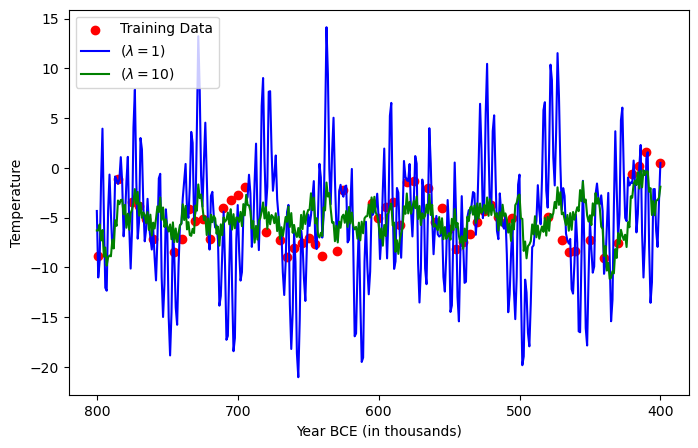

In [225]:
# Fit the weights for both models
phi_x_train = preprocess_lasso(year_train)
lam1, lam2 = 1, 10
w1 = find_lasso_weights(lam1, phi_x_train, temp_train)
w2 = find_lasso_weights(lam2, phi_x_train, temp_train)

# Plot functions
x_array = np.arange(400, 800 + 1, 1)
phi_x_array = preprocess_lasso(x_array)

# TODO: Plot the regression line generated by your model. 
# YOUR CODE HERE

# lambda 1 prediction
y_pred1 = phi_x_array @ w1 

# lambda 2 prediction
y_pred2 = phi_x_array @ w2 

# Plot the training data
plt.figure(figsize=(8, 5))
plt.scatter(year_train, temp_train, label="Training Data", color="red")

# Plot the results
plt.plot(x_array, y_pred1, label=r"($\lambda=1$)", color="blue")
plt.plot(x_array, y_pred2, label=r"($\lambda=10$)", color="green")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.gca().invert_xaxis()
plt.show()

In [226]:
# Compute MSE using basis_mse function from problem 3
mse_lam1 = basis_mse(phi_x_train, temp_train, phi_x_train, w1)
mse_lam2 = basis_mse(phi_x_train, temp_train, phi_x_train, w2)

# Print results
print(f"MSE for λ = 1: {mse_lam1:.4f}")
print(f"MSE for λ = 10: {mse_lam2:.4f}")

MSE for λ = 1: 1.9509
MSE for λ = 10: 3.1365
